### Description
This notebook describes how to load CHEST dataset using the trailmet framework.

#### Installation of trailmet
Note that if the source code version of trailmet is used, then the path to the root directory needs to be added to the system path. 

In [2]:
# adding trailmet to the system path
import sys

sys.path.append("/workspace/trailmet/")

In [3]:
# load the required packages
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from trailmet.datasets.classification import DatasetFactory

#### Specify the root data directory
This directory will be used to download (and process if needed) the required data. Any folders related to train/test etc. will be created at this path. Please adapt this path based on your system's address.

In [4]:
root_dir = "../../../chest_data/"

#### Loading CHEST Dataset

##### Specify the transforms to be applied on the inputs and labels of the train, val and test splits
All the transforms to be applied on the different splits of the data can be specified using transforms function from the torchvision library.

In [13]:
train_transform = transforms.Compose(
    [transforms.Resize((224, 224)), transforms.ToTensor()]
)

val_transform = transforms.Compose(
    [transforms.Resize((224, 224)), transforms.ToTensor()]
)

test_transform = transforms.Compose(
    [transforms.Resize((224, 224)), transforms.ToTensor()]
)

input_transforms = {
    "train": train_transform,
    "val": val_transform,
    "test": test_transform,
}

target_transforms = {"train": None, "val": None, "test": None}

##### Creating the CHEST dataset with the specified control parameters
 - test set is present on official website. For testing purposes, we used val set as test set in dataloader.

In [14]:
chest_dataset = DatasetFactory.create_dataset(
    name="CHEST",
    root="../../../chest_data/",
    subname="cardiomegaly",
    split_types=["train", "val", "test"],
    val_fraction=0.2,
    transform=input_transforms,
    target_transform=target_transforms,
)

223414it [00:54, 4107.31it/s]
234it [00:00, 3804.89it/s]
234it [00:00, 84390.98it/s]


In [15]:
print(chest_dataset["info"])

{'train_size': 223414, 'val_size': 234, 'test_size': 234, 'note': ''}


In [10]:
# getting the size of the different splits of the data
print("Train samples: ", chest_dataset["info"]["train_size"])
print("Val samples: ", chest_dataset["info"]["val_size"])
print("Test samples: ", chest_dataset["info"]["test_size"])

Train samples:  223414
Val samples:  234
Test samples:  234


In [16]:
# Construct dataloaders
train_loader = torch.utils.data.DataLoader(
    chest_dataset["train"],
    batch_size=64,
    sampler=chest_dataset["train_sampler"],
    num_workers=0,
)
val_loader = torch.utils.data.DataLoader(
    chest_dataset["val"],
    batch_size=64,
    sampler=chest_dataset["val_sampler"],
    num_workers=0,
)
test_loader = torch.utils.data.DataLoader(
    chest_dataset["test"],
    batch_size=64,
    sampler=chest_dataset["test_sampler"],
    num_workers=0,
)

print("No. of training batches: ", len(train_loader))
print("No. of validation batches: ", len(val_loader))
print("No. of test batches: ", len(test_loader))

No. of training batches:  3491
No. of validation batches:  4
No. of test batches:  4


##### Displaying a sample from the training set

Feature batch shape: torch.Size([64, 3, 224, 224])
Labels batch shape: torch.Size([64, 1])


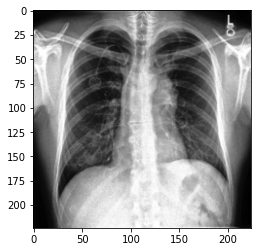

Label: tensor([0.])


In [17]:
# Display image and label.
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[7, 0, :, :].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")